In [2]:
import os
from data_set import Dataset    
from torch.utils.data import DataLoader
# Define hyperparameters
num_epochs = 1
batch_size = 32
initial_lr = 0.001
data_path =os.path.join( os.getcwd(), "full_resInput")
train_loader = DataLoader(Dataset(data_path), batch_size=batch_size, shuffle=True)
print("Datadset input Completed")

/Users/felix/Documents/Internship實習/2023工研院/Code/full_resInput
['0059.JPG', '0110.JPG', '0058.JPG', '0072.JPG', '0107.JPG', '0073.JPG', '0062.JPG', '0074.JPG', '0060.JPG', '0101.JPG', '0061.JPG', '0025.JPG', '0044.JPG', '0047.JPG', '0095.JPG', '0057.JPG', '0109.JPG', '0108.JPG']
/Users/felix/Documents/Internship實習/2023工研院/Code/full_resInput
Datadset input Completed


In [3]:
import torch
import torch.nn as nn

class Pixel(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(Pixel, self).__init__()

        # Pixel-Wise Network in High-Resolution Branch
        self.conv1e = nn.Conv2d(in_channels, 3, kernel_size=1, stride=1, padding=0)
        self.conv2e = nn.Conv2d(3, out_channels, kernel_size=1, stride=1, padding=0)

    def forward(self, input):
        # Pixel-Wise Network in High-Resolution Branch
        conv1e = self.conv1e(input)
        output = self.conv2e(conv1e)

        return output


testfile:  0044.JPG
(1, 3648, 5472)


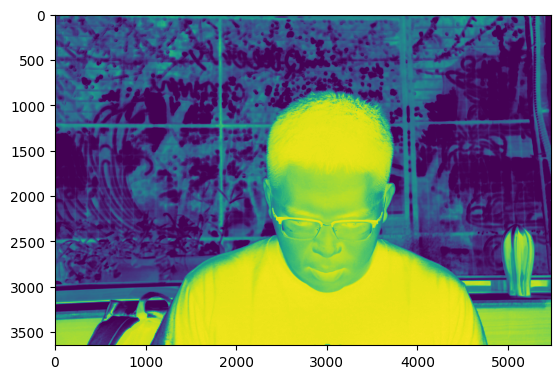

In [6]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
from torchvision.transforms import ToTensor
from PIL import Image

def train(model, train_loader, device):
    model.train()
    for inputs, targets in train_loader:
        inputs = inputs.to(device)
        targets = targets.to(device)
    return 

# Create the Network model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
net = Pixel(3,1)
model = net.to(device)
for epoch in range(num_epochs):
    train(model, train_loader , device)

def get_test_file(data_path):
    for temp in os.listdir(data_path):
        # use 0044 as test file 
        if(temp=="0044.JPG"):
            return temp



transform = ToTensor()
# Load and preprocess the input data
test_dataPath = os.path.join(os.getcwd(), "full_resInput")
test_dataName=get_test_file(test_dataPath)
print("testfile: ", test_dataName)
inputs=Image.open(os.path.join(test_dataPath, test_dataName))
inputs = transform(inputs)
feature_maps = model(inputs)  

# Convert the tensor to a numpy array
feature_maps = feature_maps.detach().numpy()
print(feature_maps.shape)

# Plot the feature maps
# fig, axes = plt.subplots(nrows=4, ncols=8, figsize=(12, 6))
# for i, ax in enumerate(axes.flat):
plt.imshow(feature_maps[0])
plt.show()
       